# Principal Component Analysis (PCA)
PCA is a way to conduct dimensionality reduction and shrink variables in the data to the most important ones, by projecting our variables to a new coordinate space to find new axes (principal components) along which the data vary the most.

Here we are trying to identify the main patterns of variation in our air quality-wildfire-weather dataset. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [54]:
df = pd.read_csv('air_quality_weather_fires.csv', index_col = 0)
df

date      site_id  ...  fire_distance_category  fire_intensity
0      2024-01-01  01-073-0023  ...                   close             low
1      2024-01-01  04-013-9997  ...                     far             low
2      2024-01-01  04-019-1028  ...                     far             low
3      2024-01-01  05-119-0007  ...                     far             low
4      2024-01-01  06-001-0011  ...                   close             low
...           ...          ...  ...                     ...             ...
19797  2024-12-31  49-035-3015  ...                     far             low
19798  2024-12-31  50-021-0002  ...                     far             low
19799  2024-12-31  51-087-0014  ...                   close             low
19800  2024-12-31  53-033-0080  ...                moderate             low
19801  2024-12-31  56-021-0100  ...                     far             low

[19802 rows x 43 columns]

In [55]:
df.columns

Index(['date', 'site_id', 'latitude', 'longitude', 'state_name', 'county_name',
       'city_name', 'site_name', 'PM25', 'CO', 'O3', 'NO2', 'SO2', 'AQI_PM25',
       'AQI_CO', 'AQI_O3', 'AQI_NO2', 'AQI_SO2', 'AQI', 'temperature_2m_mean',
       'temperature_2m_max', 'temperature_2m_min', 'relative_humidity_2m_mean',
       'wind_speed_10m_mean', 'wind_direction_10m_dominant',
       'precipitation_sum', 'precipitation_hours',
       'et0_fao_evapotranspiration', 'weather_code', 'distance_to_fire_km',
       'fire_brightness', 'fire_frp', 'fires_within_50km',
       'fires_within_100km', 'has_nearby_fire', 'datetime', 'month',
       'day_of_week', 'is_weekend', 'season', 'wildfire_season',
       'fire_distance_category', 'fire_intensity'],
      dtype='object')

In [ ]:
pca_features = [
    # Weather
    'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
    'relative_humidity_2m_mean', 'wind_speed_10m_mean', 'wind_direction_10m_dominant',
    'precipitation_sum', 'precipitation_hours', 'et0_fao_evapotranspiration',
    # Fire
    'distance_to_fire_km', 'fire_brightness', 'fire_frp', 'fires_within_50km',
    'fires_within_100km'
    ]

In [ ]:
X = df[pca_features].dropna()


In [ ]:
# corr_X = round(X.corr(), 2)

# fig_corr_X = px.imshow(
#     corr_X,
#     text_auto=True,
#     color_continuous_scale="RdBu_r",
#     aspect="auto",
#     title="Correlation Matrix of Original Variables"
# )
# fig_corr_X.update_layout(
#     width=900,
#     height=900,
# )
# fig_corr_X.show()

In [58]:
pca_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

pca_pipe.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [97]:
pca = pca_pipe.named_steps['pca']
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
n_components = len(explained_var)

ev_df = pd.DataFrame({
    "PC": np.arange(1, n_components + 1),
    "ExplainedVariance": explained_var,
    "CumulativeVariance": cumulative_var
})


fig_scree = px.line(
    ev_df, x="PC", y="ExplainedVariance",
    markers=True,
    title="Scree Plot: Proportion of Variance Explained"
)
fig_scree.show()

print("Variance explained by each PC:")
for i, var in enumerate(explained_var[:5], 1):
    print(f"  PC{i}: {var*100:.2f}%")

print(f"\nTotal variance (first 3 PCs): {cumulative_var[2]*100:.1f}%")
print(f"\nTotal variance (first 6 PCs): {cumulative_var[5]*100:.1f}%")

Variance explained by each PC:
  PC1: 27.86%
  PC2: 15.61%
  PC3: 11.67%
  PC4: 10.37%
  PC5: 8.14%

Total variance (first 3 PCs): 55.1%

Total variance (first 6 PCs): 80.9%


In [60]:
X_pca_scores = pca_pipe.transform(X)
pc_cols = [f"PC{i}" for i in range(1, n_components + 1)]

scores_df = pd.DataFrame(X_pca_scores, columns=pc_cols)
scores_df

PC1       PC2       PC3  ...      PC12      PC13      PC14
0     -1.499665 -1.539548  0.051735  ... -0.299679 -0.214091  0.000721
1     -0.774680 -0.627526 -0.035173  ... -0.444364  0.010516  0.006515
2     -0.473499 -1.083833 -0.579756  ... -0.499215  0.193706 -0.024732
3     -1.595727 -1.025382 -0.039117  ... -0.090228  0.024975 -0.008949
4     -1.274048  0.609544  0.836106  ...  0.008744  0.023047  0.026316
...         ...       ...       ...  ...       ...       ...       ...
19748 -2.562050 -1.551608  0.126765  ...  0.104477 -0.388668  0.010584
19749 -1.812915 -1.131691 -0.033219  ... -0.375729 -0.233858  0.047801
19750 -1.166059 -0.505246  0.292037  ... -0.130903  0.434285  0.031285
19751 -2.420483 -0.367225  0.352496  ...  0.055193 -0.094479  0.072943
19752 -3.843676 -1.242722  0.054322  ...  0.296488  0.018979  0.064772

[19753 rows x 14 columns]

In [116]:
# Add metadata
scores_df['PM25'] = df.loc[X.index, 'PM25']
scores_df['season'] = df.loc[X.index, 'season']
scores_df['site_name'] = df.loc[X.index, 'site_name']

print(f"\nScores dataframe shape: {scores_df.shape}")
print("\nFirst few PC scores:")
print(scores_df[['PC1', 'PC2', 'PC3', 'PM25', 'season']].head())


Scores dataframe shape: (19753, 18)

First few PC scores:
        PC1       PC2       PC3   PM25  season
0 -1.499665 -1.539548  0.051735  11.55  winter
1 -0.774680 -0.627526 -0.035173  85.35  winter
2 -0.473499 -1.083833 -0.579756  16.30  winter
3 -1.595727 -1.025382 -0.039117   5.90  winter
4 -1.274048  0.609544  0.836106   6.90  winter


In [ ]:
# Correlation matrix of principal components
# corr_PC = round(scores_df.corr(), 2)

# fig_corr_PC = px.imshow(
#     corr_PC,
#     text_auto=True,
#     color_continuous_scale="RdBu_r",
#     aspect="auto",
#     title="Correlation Matrix of Principal Components"
# )
# fig_corr_PC.update_layout(
#     width=800,
#     height=800,
# )
# fig_corr_PC.show()

In [62]:
y = df['PM25']

In [101]:
# Create PM2.5 risk categories
def categorize_pm25(pm25):
    if pd.isna(pm25):
        return 'Missing'
    elif pm25 <= 12:
        return 'Good (≤12)'
    elif pm25 <= 35:
        return 'Moderate (12-35)'
    elif pm25 <= 55:
        return 'Unhealthy for Sensitive (35-55)'
    else:
        return 'Unhealthy (>55)'

df['PM25_category'] = df['PM25'].apply(categorize_pm25)

# Use this for coloring
var = 'PM25_category'

In [118]:
# Scatterplot of points in PC1-PC2 Space
# fig_scatter = px.scatter(
#     scores_df,
#     x="PC1", y="PC2",
#     color= 'PM25',
#     hover_name= var,
#     title="PM2.5 Levels in PC1–PC2 Space",
#     color_continuous_scale="Viridis"
# )
# fig_scatter.show()

In [104]:
loadings = pca.components_.T[:, :2]
loading_df = pd.DataFrame(
    loadings,
    index=X.columns,
    columns=["PC1_loading", "PC2_loading"]
)

In [106]:
arrow_scale = 3

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=scores_df["PC1"],
    y=scores_df["PC2"],
    mode="markers",
    marker=dict(size = 6, opacity = 0.5),
    # text=scores_df[var],
    # textposition="top center",
    name="PM2.5 Levels",
    hovertext=[f"{t}, Points={p}" for t, p in zip(scores_df[var], scores_df['PM25'])],
    hoverinfo="text"
))


for var_name, row in loading_df.iterrows():
    x_arrow = row["PC1_loading"] * arrow_scale
    y_arrow = row["PC2_loading"] * arrow_scale


    fig.add_trace(go.Scatter(
        x=[0, x_arrow],
        y=[0, y_arrow],
        mode="lines+markers+text",
        text=[None, var_name],
        textposition="top center",
        showlegend=False
    ))

fig.update_layout(
    title="PCA Biplot: PC1 vs PC2 with Variable Directions",
    xaxis_title="PC1",
    yaxis_title="PC2",
    xaxis=dict(zeroline=True),
    yaxis=dict(zeroline=True),
    width=800,
    height=700
)

fig.show()

In [132]:
# Create biplot
arrow_scale = 3
fig = go.Figure()

# Add observations (colored by PM2.5)
fig.add_trace(go.Scatter(
    x=scores_df['PC1'],
    y=scores_df['PC2'],
    mode='markers',
    marker=dict(
        size=5,
        color=scores_df['PM25'],
        colorscale='RdYlGn_r',
        opacity=0.6,
        colorbar=dict(title='PM2.5<br>(µg/m³)')
    ),
    name='Observations',
    showlegend=False,
    hovertemplate='PM2.5: %{marker.color:.2f}<br>PC1: %{x:.2f}<br>PC2: %{y:.2f}<extra></extra>'
))

# Add loading arrows
for var_name, row in loading_df.iterrows():
    x_arrow = row['PC1_loading'] * arrow_scale
    y_arrow = row['PC2_loading'] * arrow_scale
    
    # Arrow line
    fig.add_trace(go.Scatter(
        x=[0, x_arrow],
        y=[0, y_arrow],
        mode='lines',
        line=dict(color='red', width=3),
        showlegend=False,
        hoverinfo='skip'
    ))
    
    # Arrow label
    fig.add_annotation(
        x=x_arrow * 1.15,
        y=y_arrow * 1.15,
        text=f'<b>{var_name}</b>',
        showarrow=False,
        font=dict(size=10, color='darkred'),
        bgcolor='rgba(255,255,255,0.9)',
        bordercolor='red',
        borderwidth=1.5,
        borderpad=3
    )

fig.update_layout(
    title=f'PCA Biplot: PC1 ({explained_var[0]*100:.1f}%) vs PC2 ({explained_var[1]*100:.1f}%)',
    xaxis_title=f'PC1 ({explained_var[0]*100:.1f}% variance)',
    yaxis_title=f'PC2 ({explained_var[1]*100:.1f}% variance)',
    xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    yaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    width=1000,
    height=800,
    hovermode='closest'
)

fig.show()

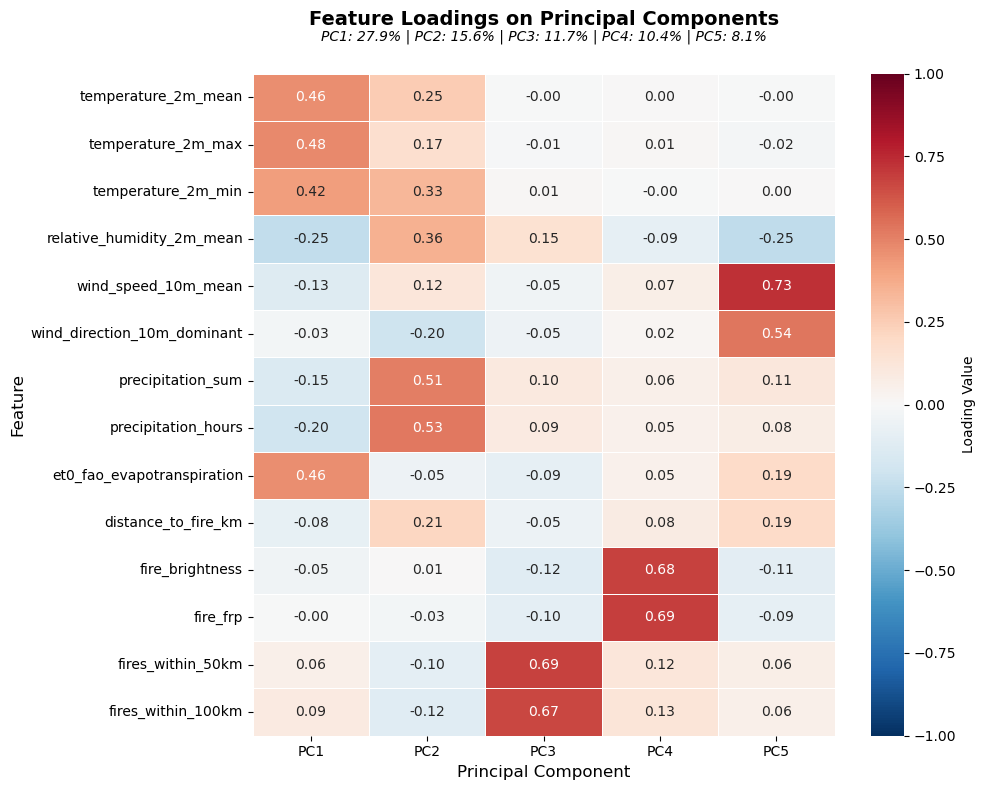

In [131]:
# Get loadings for first 5 PCs
n_pcs_show = 5
loadings_df = pd.DataFrame(
    pca.components_[:n_pcs_show, :].T,
    columns=[f'PC{i+1}' for i in range(n_pcs_show)],
    index=pca_features
)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    loadings_df,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Loading Value'},
    ax=ax
)

ax.set_title('Feature Loadings on Principal Components', fontsize=14, fontweight='bold', pad=35)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)

# Add variance explained as subtitle
variance_text = ' | '.join([f'PC{i+1}: {explained_var[i]*100:.1f}%' for i in range(n_pcs_show)])
ax.text(0.5, 1.05, variance_text, transform=ax.transAxes, 
        ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# Shows which features contribute most to each PC, allowing us to name / interpret PCs

PC1 represents the primary thermal axis (27.9% variance explained): this separates hot, dry conditions from cool, humid conditions. Temperature varies dramatically across seasons and locations so it makes sense that this is the largest source of variation. Fire variables do not load heavily on PC1, suggesting that fires occur across various temperature ranges.

PC2 represents precipitation & moisture (15.6% variance explained): this separates rainy days from dry days. High scores correspond to higher precipitation, higher humidity and higher minimum temperatures. Low scores indicate dry conditions with clearer skies.

PC3 represents fire proximity & activity (11.7% variance explained): this captures the presence of fires near monitoring sites (within 50km and 100km radius of a site).

PC4 represents fire intensity (10.4% variance explained): this captures the brightness and radiative power of fires.

PC5 represents wind patterns (8.1% variance explained): this captures strong winds from a particular direction, with lower humidity.


The separation of fire characteristics (PC3, PC4) from weather conditions (PC1, PC2, PC5) demonstrates that wildfire activity varies independently of basic weather patterns.


In [130]:
# Option A: Violin plot
fig = px.violin(
    scores_df,
    y='PC1',
    x='season',
    color='season',
    box=True,
    points='outliers',
    title='PC1 Distribution by Season',
    labels={'PC1': f'PC1 ({explained_var[0]*100:.1f}% variance)'}
)

fig.update_layout(
    width=800,
    height=600,
    showlegend=False
)

fig.show()

# Shows how different groups separate in PC space

We see that different seasons have different PC scores -- this corroborates what we see in the loading heatmap, that PC1 represents a temperature/thermal axis. It makes sense that we see the lowest values in winter when it's coldest and the highest values in summer when it's hottest. Spring and fall fare similarly when it comes to temperature/humidity.

In [ ]:
# 3D scatterplot for 1st three principal components
fig = go.Figure(data=[go.Scatter3d(
    x=scores_df['PC1'],
    y=scores_df['PC2'],
    z=scores_df['PC3'],
    mode='markers',
    marker=dict(
        size=4,
        color=scores_df['PM25'],
        colorscale='RdYlGn_r',
        opacity=0.6,
        colorbar=dict(title='PM2.5<br>(µg/m³)')
    ),
    text=[f'PM2.5: {pm:.1f}' for pm in scores_df['PM25']],
    hovertemplate='<b>%{text}</b><br>PC1: %{x:.2f}<br>PC2: %{y:.2f}<br>PC3: %{z:.2f}<extra></extra>'
)])

fig.update_layout(
    title=f'3D PCA: First Three Principal Components<br><sub>PC1: {explained_var[0]*100:.1f}% | PC2: {explained_var[1]*100:.1f}% | PC3: {explained_var[2]*100:.1f}%</sub>',
    scene=dict(
        xaxis_title=f'PC1 ({explained_var[0]*100:.1f}%)',
        yaxis_title=f'PC2 ({explained_var[1]*100:.1f}%)',
        zaxis_title=f'PC3 ({explained_var[2]*100:.1f}%)'
    ),
    width=900,
    height=700
)

fig.show()

3D scatterplot to visualize three principal components at once -- really goes to show how low PM2.5 values dominate our dataset.

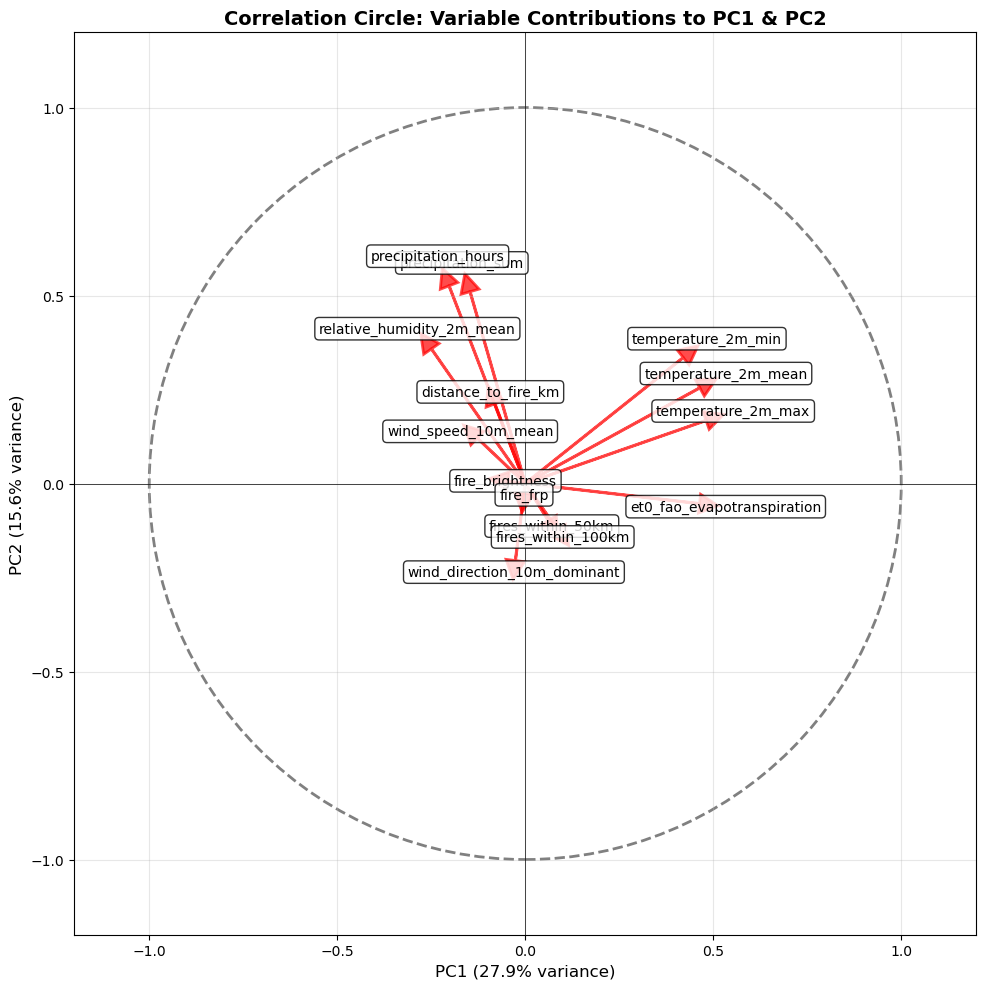

In [128]:
# Correlation circle (for first 2 PCs)
fig, ax = plt.subplots(figsize=(10, 10))

# Draw circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=2)
ax.add_patch(circle)

# Plot loadings as arrows
for i, feature in enumerate(pca_features):
    x = loadings_df.loc[feature, 'PC1']
    y = loadings_df.loc[feature, 'PC2']
    
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, 
             fc='red', ec='red', linewidth=2, alpha=0.7)
    
    # Label
    ax.text(x * 1.15, y * 1.15, feature, fontsize=10, 
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}% variance)', fontsize=12)
ax.set_title('Correlation Circle: Variable Contributions to PC1 & PC2', 
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

This is a way for us to more easily visualize the directions in which features move when looking at the first two principal components. We can see that highly correlated variables like precipitation_hours and precipitation_sum move together, similarly for temperature_2m_min/mean/max. Fire distance variables move in opposite directions from precipitation showing negative correlation, and are interestingly orthogonal to temperature. We can see that PC1 represents temperature-evapotranspiration, while PC2 captures precipitation and humidity. 

In [129]:
from plotly.subplots import make_subplots

# Create 2x2 subplot
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        f'Colored by PM2.5',
        f'Colored by Season',
        f'Colored by Wildfire Season',
        f'Colored by Fire Proximity'
    ),
    horizontal_spacing=0.1,
    vertical_spacing=0.12
)

# 1. PM2.5 (continuous)
fig.add_trace(
    go.Scatter(
        x=scores_df['PC1'],
        y=scores_df['PC2'],
        mode='markers',
        marker=dict(size=4, color=scores_df['PM25'], colorscale='Viridis', opacity=0.6),
        showlegend=False
    ),
    row=1, col=1
)

# 2. Season
for season in scores_df['season'].unique():
    mask = scores_df['season'] == season
    fig.add_trace(
        go.Scatter(
            x=scores_df.loc[mask, 'PC1'],
            y=scores_df.loc[mask, 'PC2'],
            mode='markers',
            marker=dict(size=4, opacity=0.6),
            name=season,
            legendgroup='season'
        ),
        row=1, col=2
    )

# 3. Wildfire season
wf_colors = {0: 'lightblue', 1: 'red'}
for wf in [0, 1]:
    mask = df.loc[scores_df.index, 'wildfire_season'] == wf
    label = 'Wildfire Season' if wf == 1 else 'Other'
    fig.add_trace(
        go.Scatter(
            x=scores_df.loc[mask, 'PC1'],
            y=scores_df.loc[mask, 'PC2'],
            mode='markers',
            marker=dict(size=4, opacity=0.6, color=wf_colors[wf]),
            name=label,
            legendgroup='wildfire'
        ),
        row=2, col=1
    )

# 4. Fire distance category
for category in df.loc[scores_df.index, 'fire_distance_category'].unique():
    mask = df.loc[scores_df.index, 'fire_distance_category'] == category
    fig.add_trace(
        go.Scatter(
            x=scores_df.loc[mask, 'PC1'],
            y=scores_df.loc[mask, 'PC2'],
            mode='markers',
            marker=dict(size=4, opacity=0.5),
            name=category,
            legendgroup='fire'
        ),
        row=2, col=2
    )

# Update axes
for i in range(1, 3):
    for j in range(1, 3):
        fig.update_xaxes(title_text='PC1', row=i, col=j)
        fig.update_yaxes(title_text='PC2', row=i, col=j)

fig.update_layout(
    title_text='PCA Biplot: Multiple Perspectives',
    height=900,
    width=1300
)

fig.show()

Visualizing the PC1 vs. PC2 biplot using different variables to color the graphs. Would be a cool option in a dashboard to have a drop-down feature, by which you can select what variable to act as the color -- but will leave for future application!